<h1>HR Analytics</h1>

In [296]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [297]:
#! pip install seaborn

<h2>データの確認</h2>

In [298]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [299]:
data['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [300]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [301]:
len(data)

1470

In [302]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [303]:
data['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17])

In [304]:
def calc_ave_year(total_work_years, years_at_company, num_companies_worked):
    if num_companies_worked == 0:
        ave_year = 0
    else:
        ave_year = (total_work_years - years_at_company) / num_companies_worked
        
    return ave_year

In [305]:
data['Ave_year'] = list(map(calc_ave_year, data['TotalWorkingYears'], data['YearsAtCompany'], data['NumCompaniesWorked']))

In [306]:
data[data['Ave_year'] == 1 & data['Attrition'] == 1]

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

<h2>Plotting Glaphs</h2>

In [10]:
#Categorical features
categ_feat = ['BusinessTravel', 'Department',
       'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus',
       'Over18', 'OverTime',  'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'WorkLifeBalance']

In [11]:
#Numerical features
num_feat = ['Age', 
       'DistanceFromHome',
       'EmployeeNumber','HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Ave_year']

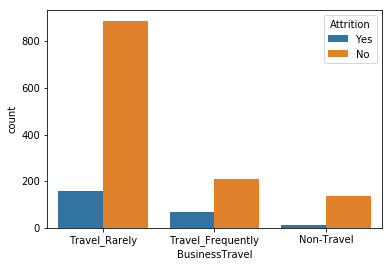

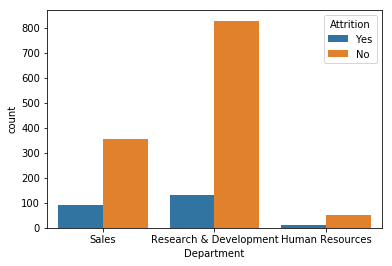

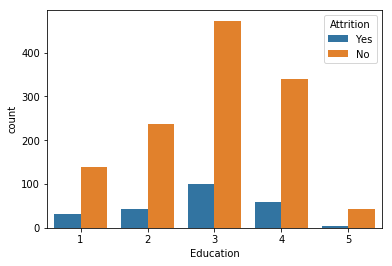

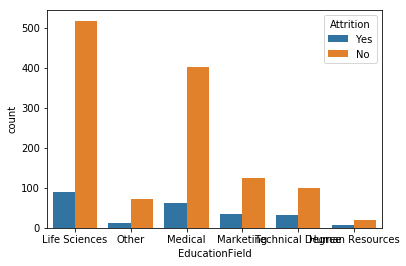

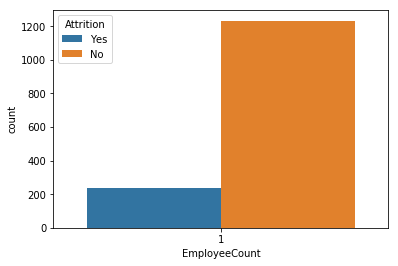

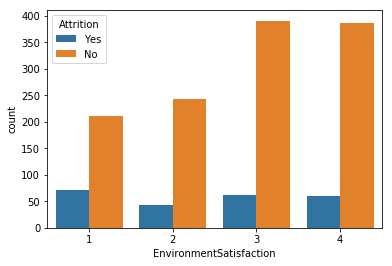

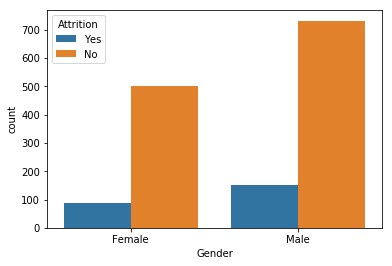

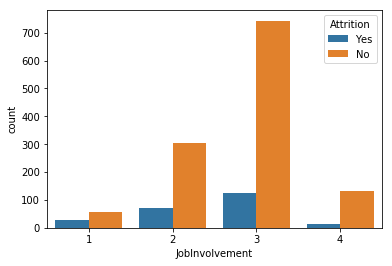

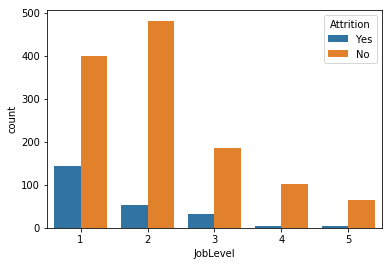

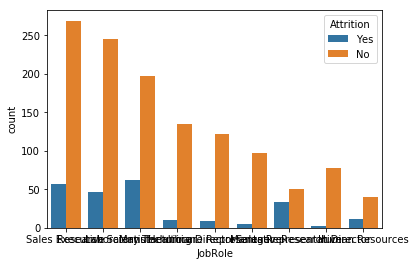

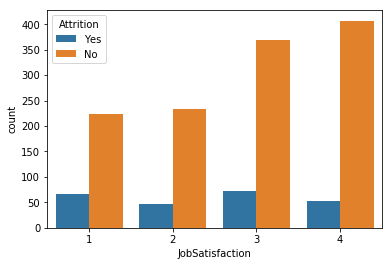

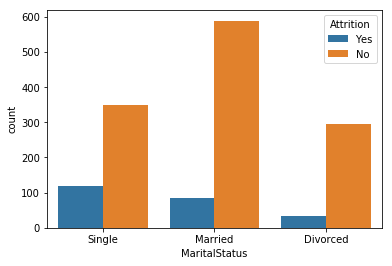

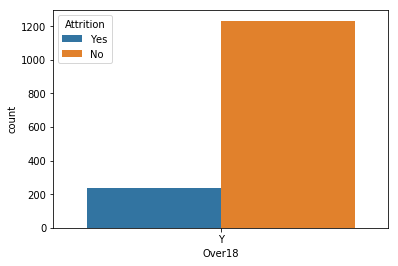

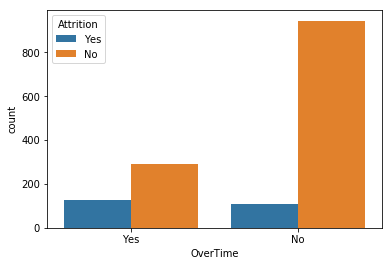

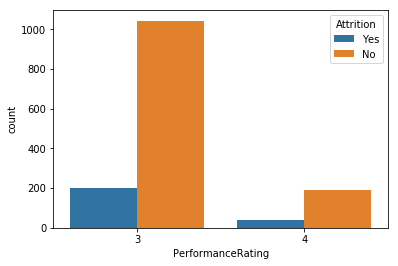

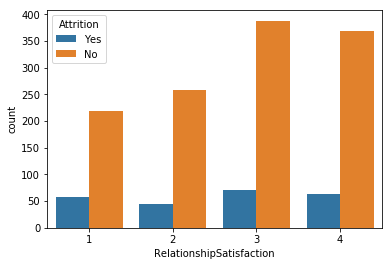

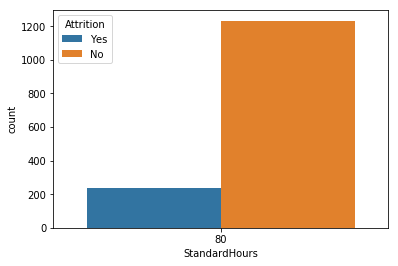

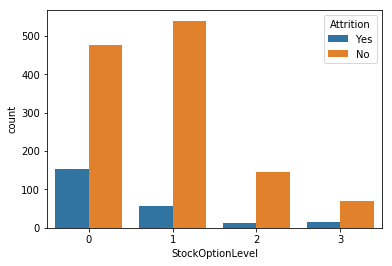

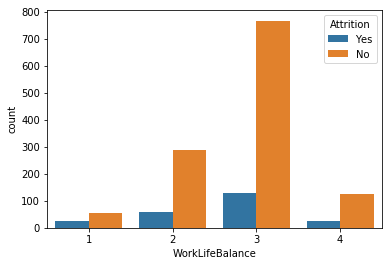

In [12]:
#Plots for Categorical columns
for col in categ_feat:
    fig = plt.figure()
    fig = sns.countplot(x = col, data=data, hue='Attrition')

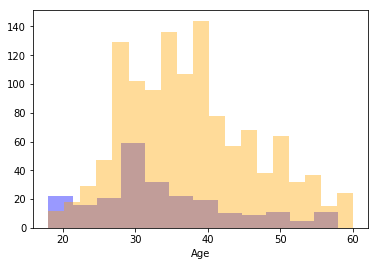

In [13]:
data_attr = data[data['Attrition']=='Yes']
data_non_attr = data[data['Attrition']=='No']

fig = plt.figure()
flg = sns.distplot(data_attr['Age'], kde=False, color='blue')
flg = sns.distplot(data_non_attr['Age'], kde=False, color='orange')
plt.show()

In [14]:
data['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3])

In [15]:
data['Ave_year'].unique()

array([ 0.25      ,  0.        ,  1.16666667,  0.44444444,  2.75      ,
        1.66666667,  0.4       ,  3.        ,  0.6       ,  0.71428571,
        2.        ,  0.66666667,  6.66666667,  1.5       ,  2.5       ,
        6.        ,  1.        ,  0.55555556,  1.75      ,  1.25      ,
        2.44444444,  0.42857143,  8.        , 12.        ,  0.5       ,
        2.28571429,  1.33333333,  4.25      ,  7.66666667,  0.57142857,
        7.75      ,  5.5       ,  3.5       ,  3.2       ,  3.33333333,
        9.        ,  1.83333333,  1.2       ,  0.22222222,  3.75      ,
        7.        ,  5.33333333,  0.375     ,  4.5       ,  0.33333333,
        2.33333333,  4.66666667,  0.8       ,  1.44444444,  1.85714286,
        5.        ,  0.625     ,  8.33333333,  0.77777778,  2.66666667,
        0.75      ,  0.88888889,  2.11111111,  1.8       ,  0.28571429,
        2.57142857,  1.125     ,  7.5       ,  4.33333333,  2.625     ,
       12.5       ,  8.5       ,  3.16666667,  3.22222222, 11.5 

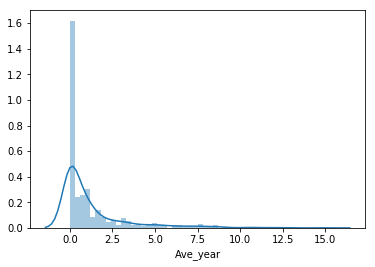

In [16]:
sns.distplot(data['Ave_year'])

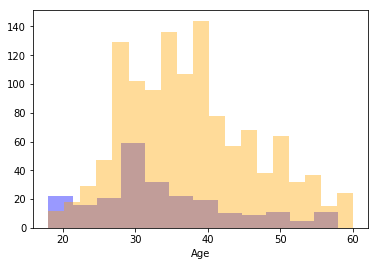

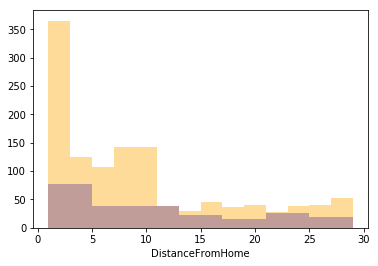

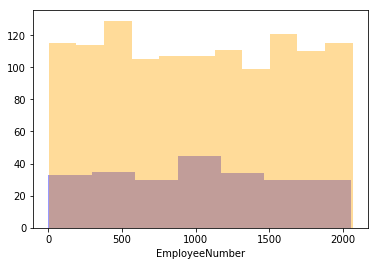

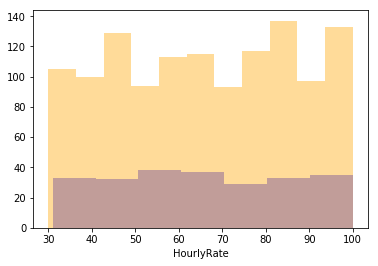

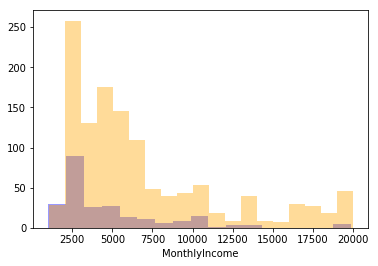

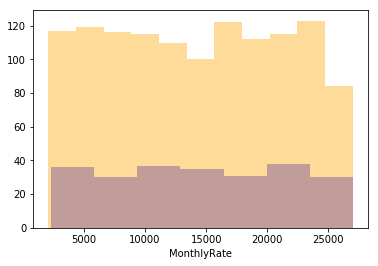

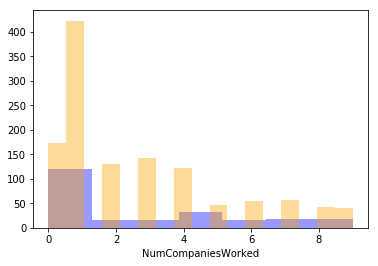

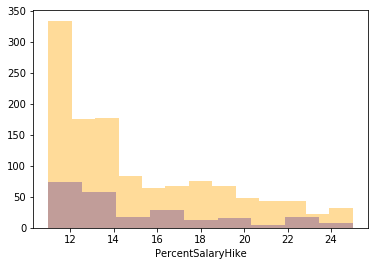

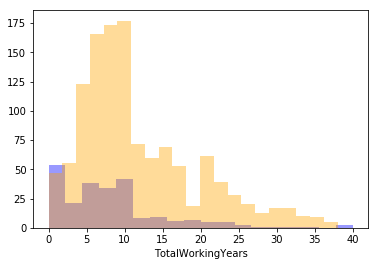

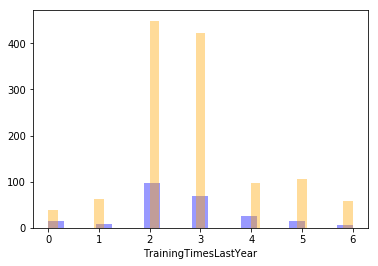

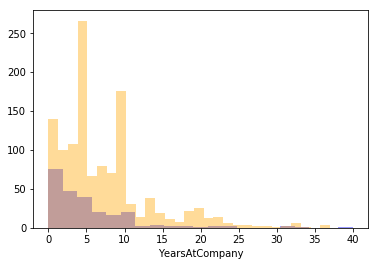

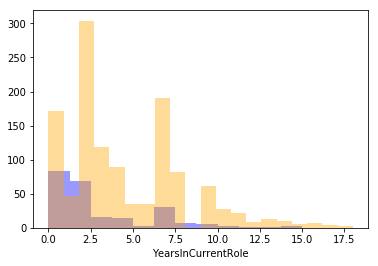

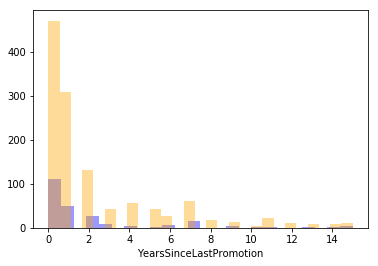

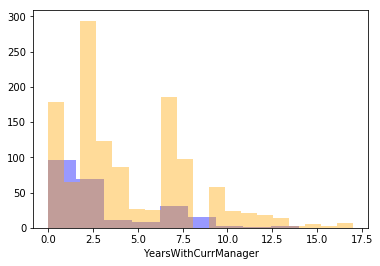

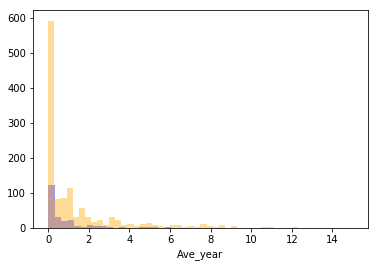

In [17]:
#Plotting 
data_attr = data[data['Attrition']=='Yes']
data_non_attr = data[data['Attrition']=='No']
for col in num_feat:
    fig = plt.figure()
    flg = sns.distplot(data_attr[col], kde=False, color='blue')
    flg = sns.distplot(data_non_attr[col], kde=False, color='orange')
    plt.show()

<h2>Consideration</h2>

#Memo
平均勤続年数を取得することができるのではないか？
Education FieldとDepartmentとで、専門領域に関する学識経験を導き出せる？→xgbではそんなに関係なさそう・・。
働き始めた年齢

数値を正規分布に直すことによって結果が変わったりしないか？Box Cox変換・・・

<h2>Model Prediction</h2>

In [18]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

for col in data.columns:
    if not ('int' in str(data[col].dtype)):
        le = LabelEncoder()
        le.fit(data[col])
        data[col] = le.transform(data[col])

In [19]:
data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Ave_year
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,0.512550
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199,-0.091191
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636,0.046812
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,0.049361
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282,-0.024783
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.022463
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,0.124665
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130,-0.017411
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197,0.007545


In [146]:
data = data.drop(columns=['EmployeeNumber', 'Over18', 'StandardHours'])

In [147]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Ave_year
0,41,1,2,1102,2,1,2,1,1,2,...,1,0,8,0,1,6,4,0,5,2
1,49,0,1,279,1,8,1,1,1,3,...,4,1,10,3,3,10,7,1,7,0
2,37,1,2,1373,1,2,2,4,1,4,...,2,0,7,3,3,0,0,0,0,26
3,33,0,1,1392,1,3,4,1,1,4,...,3,0,8,3,3,8,7,3,0,0
4,27,0,2,591,1,2,1,3,1,1,...,4,1,6,3,3,2,2,2,2,8


In [21]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns='Attrition'), data['Attrition'], test_size=0.33, random_state=42)

In [252]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=2, n_estimators=180)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [253]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [254]:
accuracy_score(y_test, prediction)

0.8806584362139918

In [255]:
confusion_matrix(y_test, prediction)

array([[407,   9],
       [ 49,  21]])

In [153]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [154]:
import xgboost

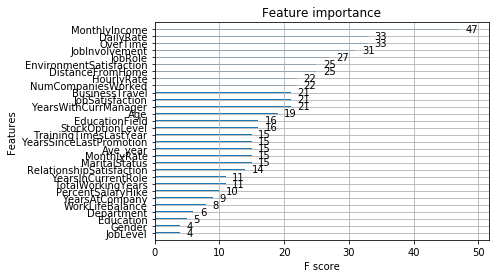

In [256]:
xgboost.plot_importance(model)

In [57]:
! brew install graphviz

Updating Homebrew...
==> Downloading https://homebrew.bintray.com/bottles-portable-ruby/portable-ruby-2.6.3.mavericks.bottle.tar.gz
######################################################################## 100.0%
==> Pouring portable-ruby-2.6.3.mavericks.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 1 tap (homebrew/core).
==> New Formulae
adios2                                   liblouis
allureofthestars                         libsigc++@2
alp                                      libsixel
anime-downloader                         libspng
antibody                                 libtensorflow@1
appium                                   libtorch
appstream-glib                           libvncserver
arduino-cli                              libzt
asyncplusplus                            lightgbm
atasm                                    lizard
atlantis                                 llvm@8
aws-cdk                                  manticoresearch
aws-google-auth                          mar


==> Installing dependencies for graphviz: libpng, freetype, fontconfig, jpeg, libtiff, webp, gd, gettext, libffi, pcre, pkg-config, gdbm, openssl@1.1, readline, sqlite, xz, python, glib, jasper, netpbm, gts and libtool
==> Installing graphviz dependency: libpng
==> Downloading https://homebrew.bintray.com/bottles/libpng-1.6.37.mojave.bottle
==> Downloading from https://akamai.bintray.com/53/53bbd14cc27c86c16605e256e7646
######################################################################## 100.0%
==> Pouring libpng-1.6.37.mojave.bottle.tar.gz
🍺  /usr/local/Cellar/libpng/1.6.37: 27 files, 1.2MB
==> Installing graphviz dependency: freetype
==> Downloading https://homebrew.bintray.com/bottles/freetype-2.10.1.mojave.bott
==> Downloading from https://akamai.bintray.com/2f/2f5716f987df6f45a9d66e5f9af93
######################################################################## 100.0%
==> Pouring freetype-2.10.1.mojave.bottle.tar.gz
🍺  /usr/local/Cellar/freetype/2.10.1: 61 files, 2.2MB
==> In

######################################################################## 100.0%
==> Pouring readline-8.0.1.mojave.bottle.tar.gz
==> Caveats
readline is keg-only, which means it was not symlinked into /usr/local,
because macOS provides the BSD libedit library, which shadows libreadline.
In order to prevent conflicts when programs look for libreadline we are
defaulting this GNU Readline installation to keg-only.

For compilers to find readline you may need to set:
  export LDFLAGS="-L/usr/local/opt/readline/lib"
  export CPPFLAGS="-I/usr/local/opt/readline/include"

For pkg-config to find readline you may need to set:
  export PKG_CONFIG_PATH="/usr/local/opt/readline/lib/pkgconfig"

==> Summary
🍺  /usr/local/Cellar/readline/8.0.1: 48 files, 1.5MB
==> Installing graphviz dependency: sqlite
==> Downloading https://homebrew.bintray.com/bottles/sqlite-3.30.1.mojave.bottle
==> Downloading from https://akamai.bintray.com/5e/5e6fef2d754e0e4009d502c40ad18
########################################

In [59]:
from lightgbm import LGBMClassifier

In [283]:
model2 = LGBMClassifier(max_depth=2, n_estimators=150, num_leaves=30, learning_rate=0.1)

In [284]:
model2.fit(X_train,y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=2,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=150, n_jobs=-1, num_leaves=30, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [285]:
prediction2 = model2.predict(X_test)

/anaconda3/envs/UdacityDL/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [286]:
accuracy_score(y_test, prediction2)

0.8827160493827161

In [287]:
confusion_matrix(y_test, prediction2)

array([[409,   7],
       [ 50,  20]])

In [291]:
237/(1233+237)

0.16122448979591836

In [294]:
18/70

0.2571428571428571

In [215]:
import lightgbm

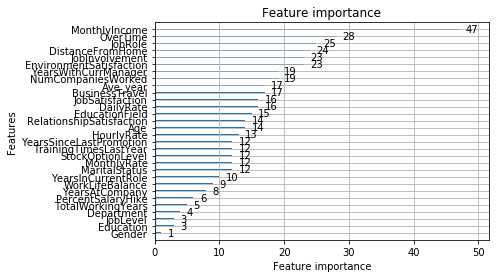

In [216]:
lightgbm.plot_importance(model2)

In [295]:
data['EducationField'].unique()

array([1, 4, 3, 2, 5, 0])